In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.pyplot import rcParams
rcParams["figure.figsize"]=15,5
import seaborn as sns

from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.holtwinters import ExponentialSmoothing

In [2]:
ls

 Volume in drive C is Windows
 Volume Serial Number is 38A6-1C25

 Directory of C:\Users\Administrator\Documents\Assignments\Forecasting Time series

06-05-2023  14:14    <DIR>          .
21-04-2023  12:07    <DIR>          ..
06-05-2023  11:06    <DIR>          .ipynb_checkpoints
14-04-2023  15:55             9,559 Airlines+Data.xlsx
14-04-2023  15:55             9,422 CocaCola_Sales_Rawdata.xlsx
06-05-2023  14:02             1,344 dataset.csv
06-05-2023  11:09           230,063 Forecasting Airlines.ipynb
06-05-2023  11:06           187,934 Forecasting CocaCola.ipynb
06-05-2023  14:14         1,383,429 Forecasting_Airlines_assignment.ipynb
19-04-2023  11:21           408,928 infosys forecast.ipynb
18-04-2023  23:24            37,717 infy-price.csv
18-04-2023  23:13           322,841 NSE-Prices.xls
18-04-2023  19:46         1,591,158 practice airlines.ipynb
14-04-2023  15:55               233 Problem_statement.txt
06-05-2023  14:02               192 validation.csv
              12 File

In [3]:
data=pd.read_excel("Airlines+Data.xlsx")

In [4]:
data.head()

,Month,Passengers
0,1995-01-01,112
1,1995-02-01,118
2,1995-03-01,132
3,1995-04-01,129
4,1995-05-01,121


In [5]:
data.isna().sum()

Month         0
Passengers    0
dtype: int64

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 96 entries, 0 to 95
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   Month       96 non-null     datetime64[ns]
 1   Passengers  96 non-null     int64         
dtypes: datetime64[ns](1), int64(1)
memory usage: 1.6 KB


In [7]:
data=pd.read_excel("Airlines+Data.xlsx",index_col=0)

In [8]:
data.head()

,Passengers
Month,
1995-01-01,112
1995-02-01,118
1995-03-01,132
1995-04-01,129
1995-05-01,121


<AxesSubplot:xlabel='Month'>

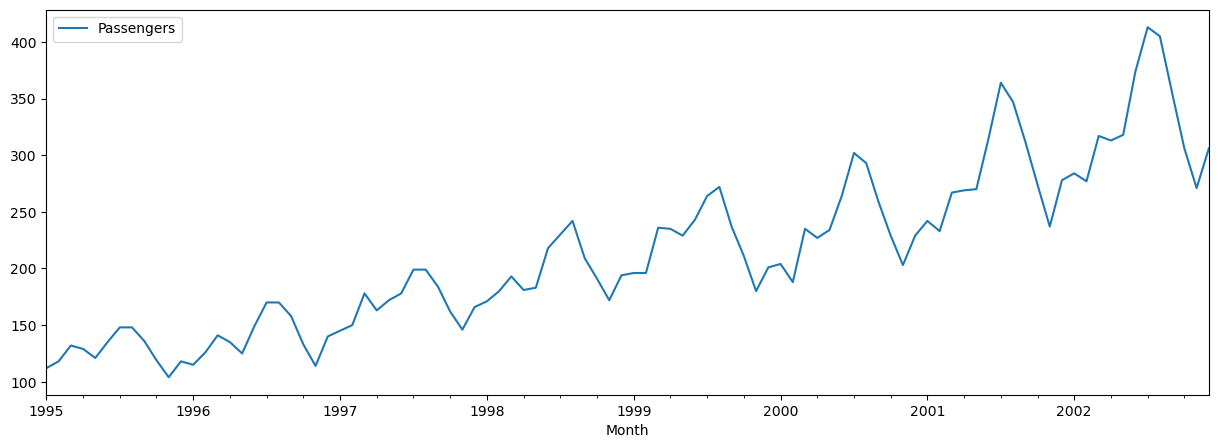

In [9]:
data.plot()

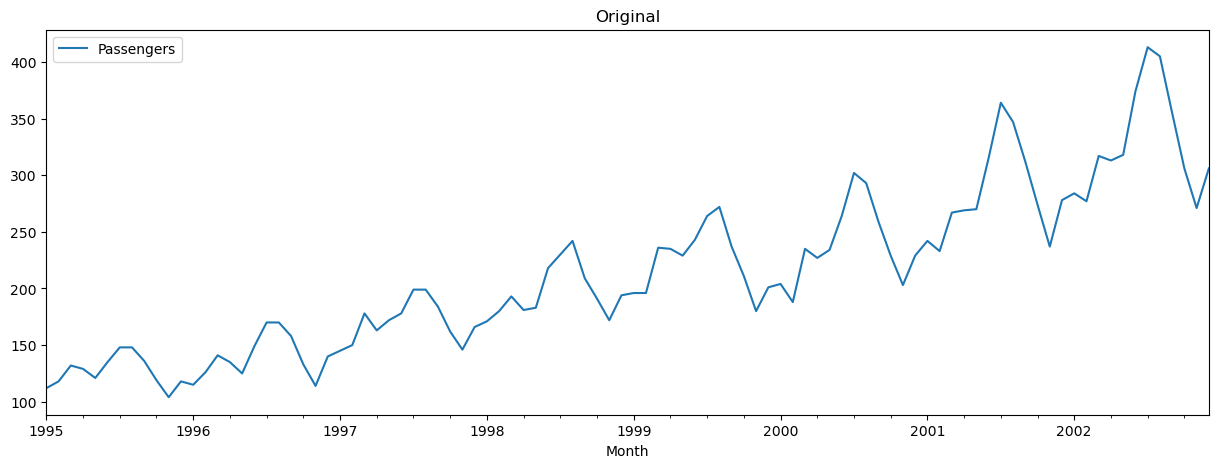

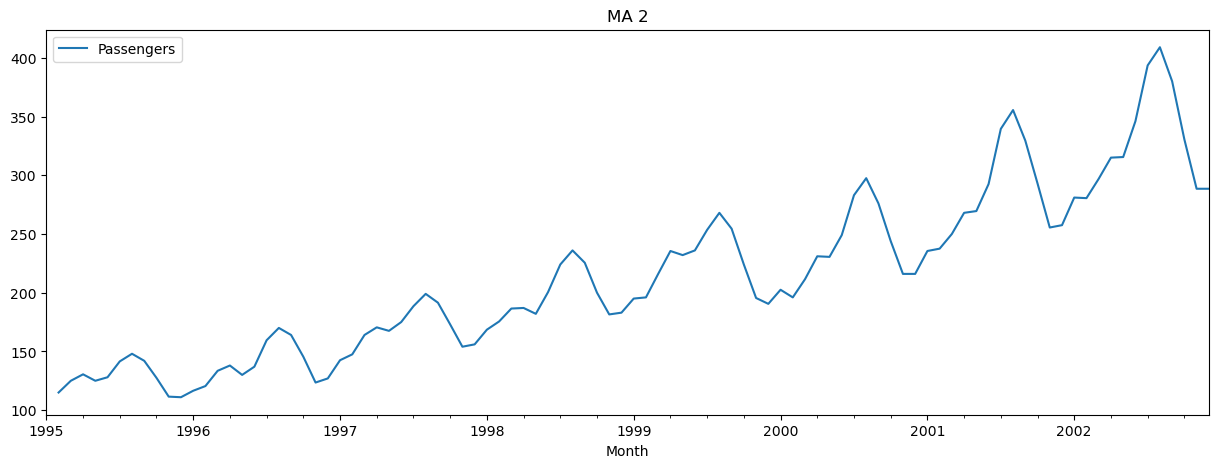

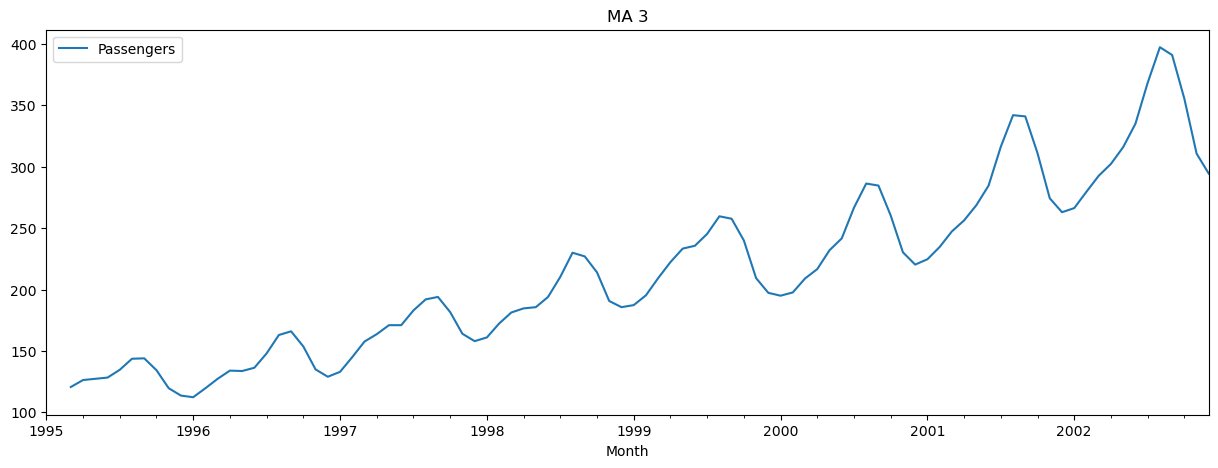

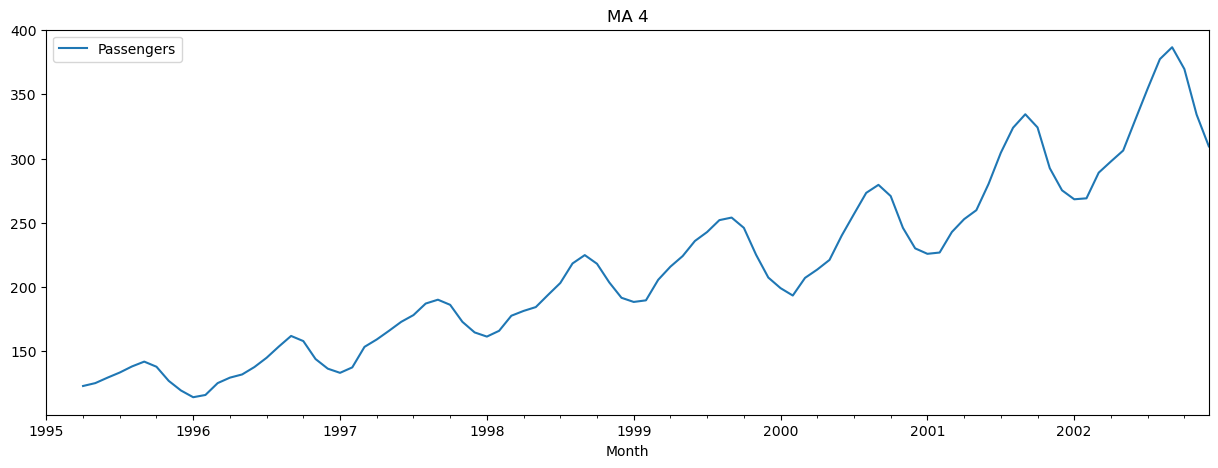

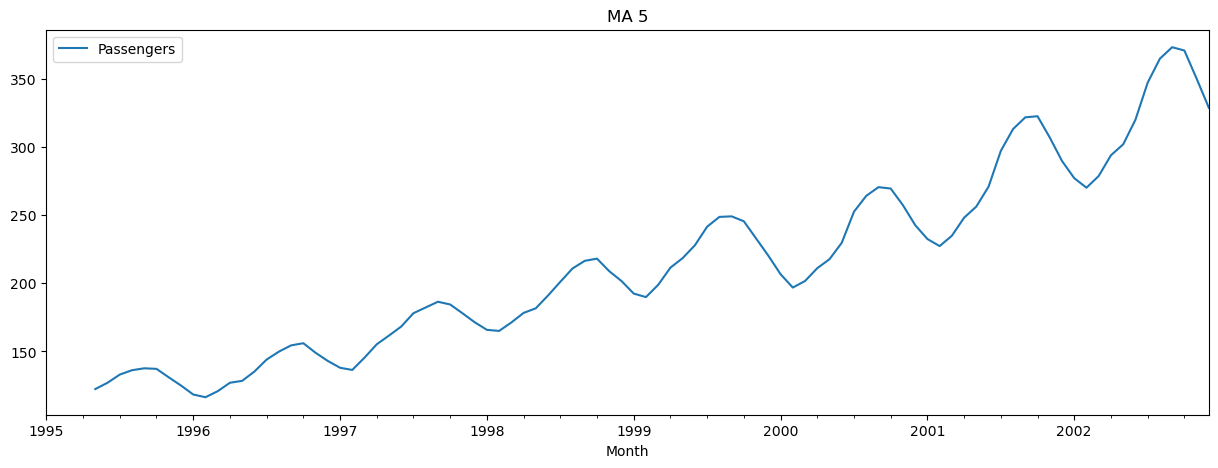

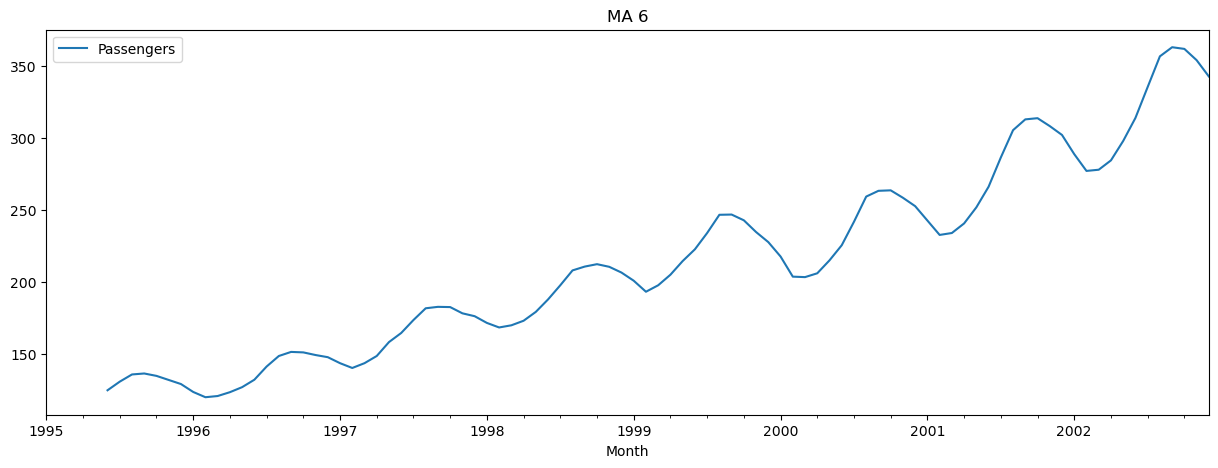

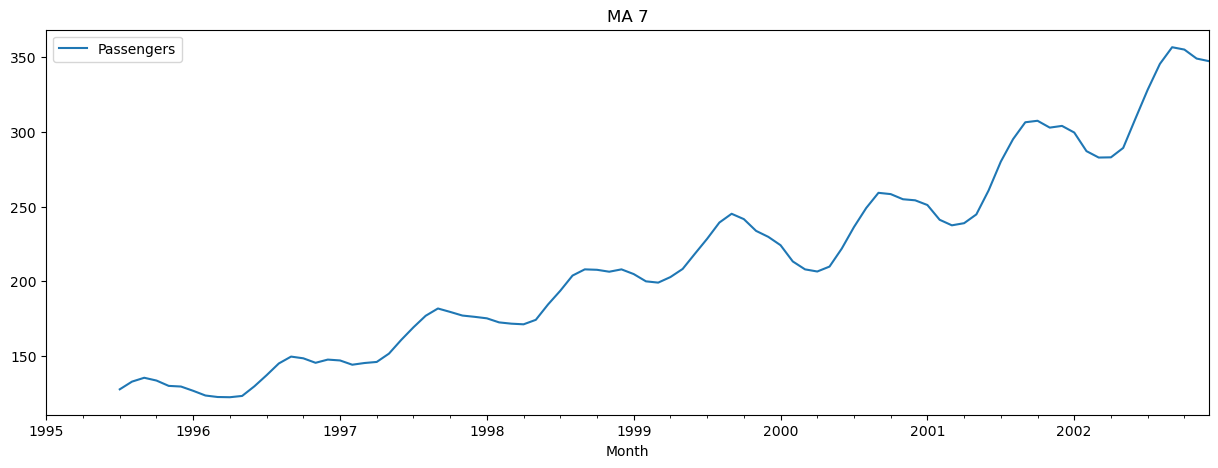

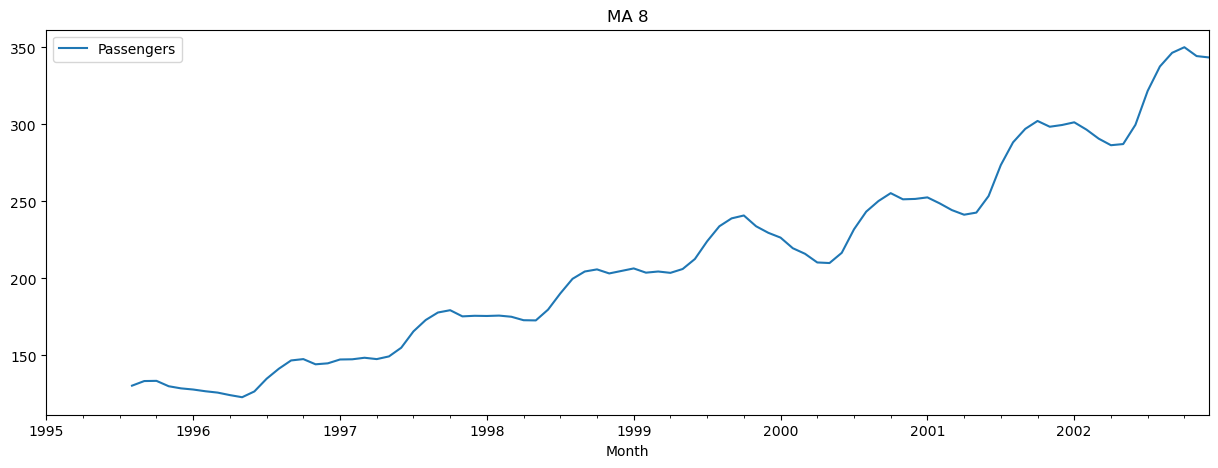

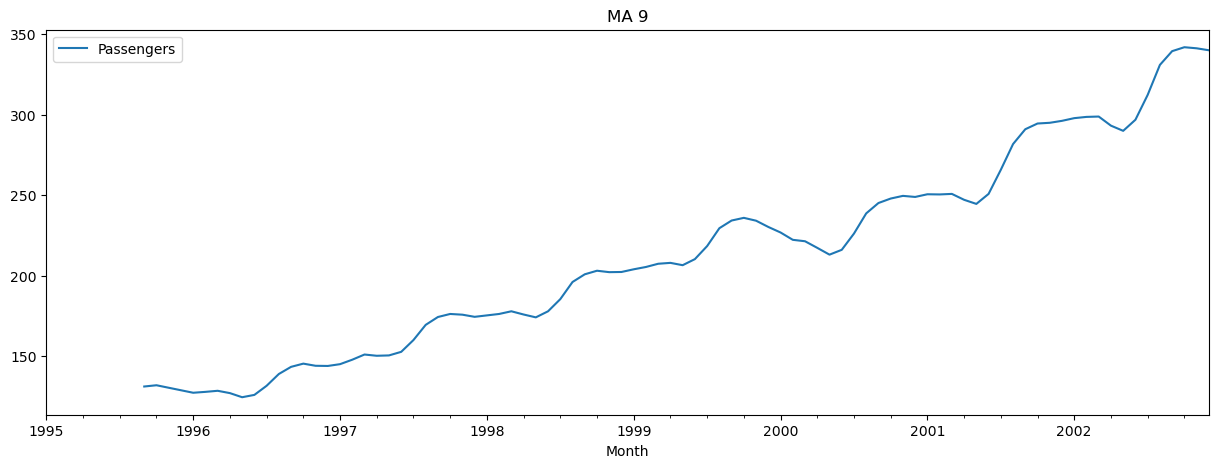

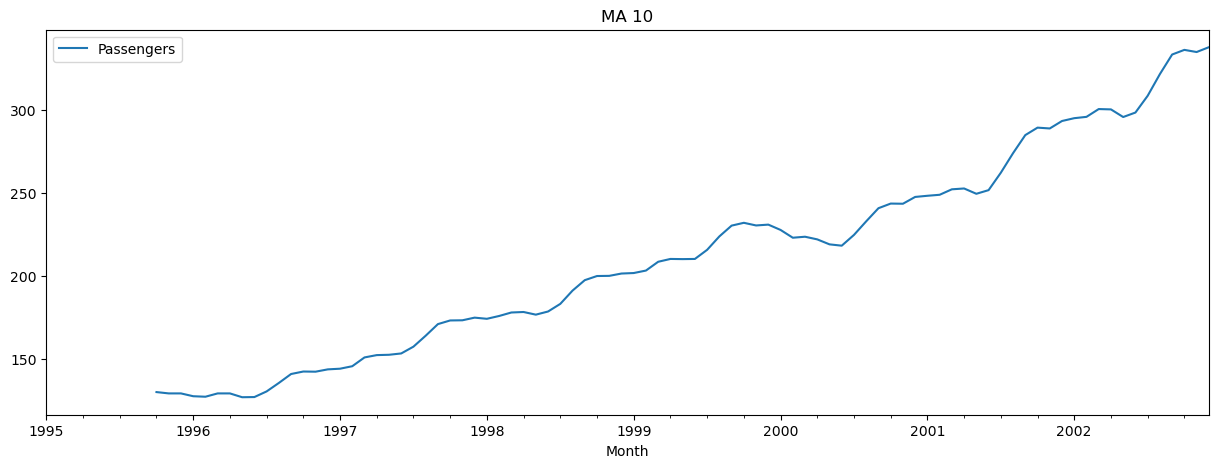

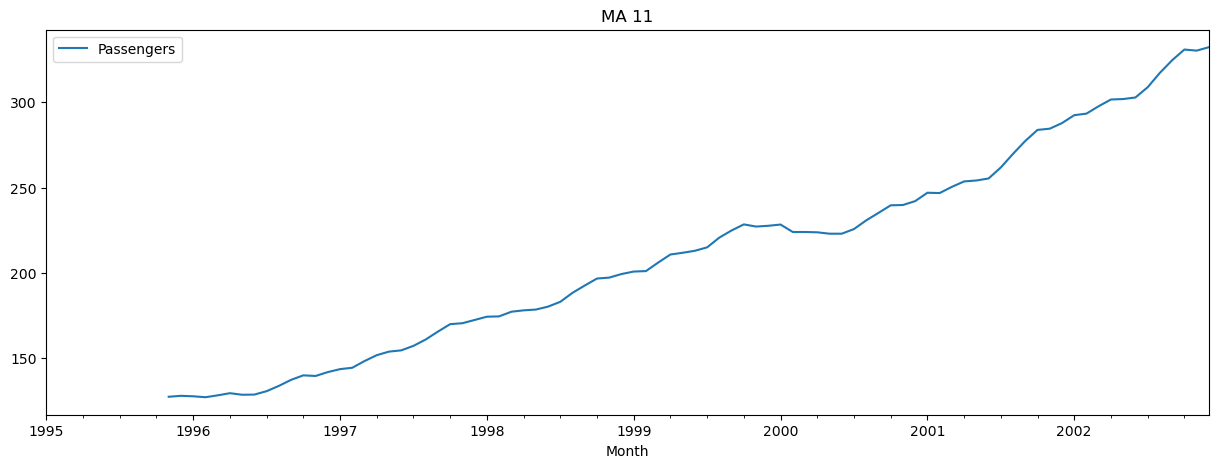

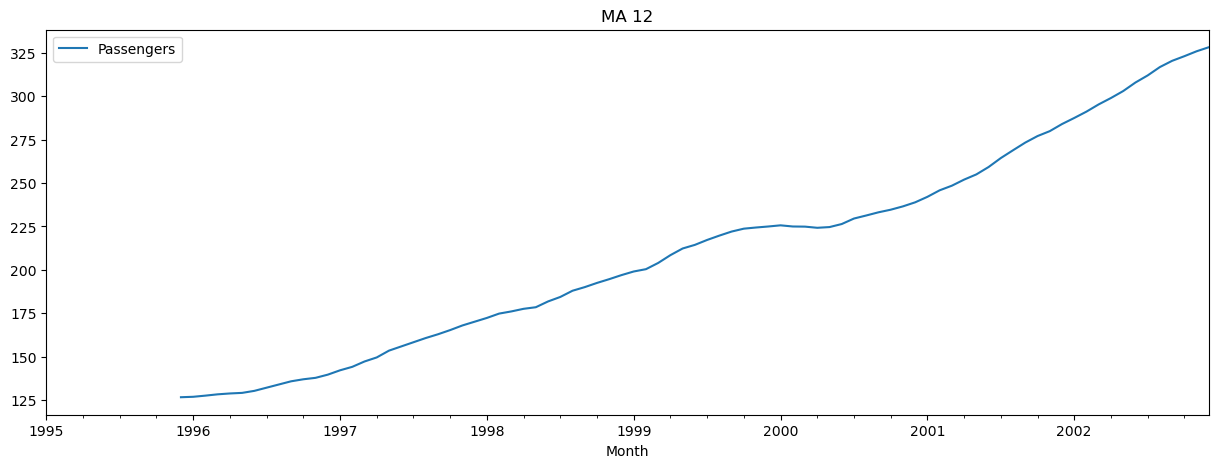

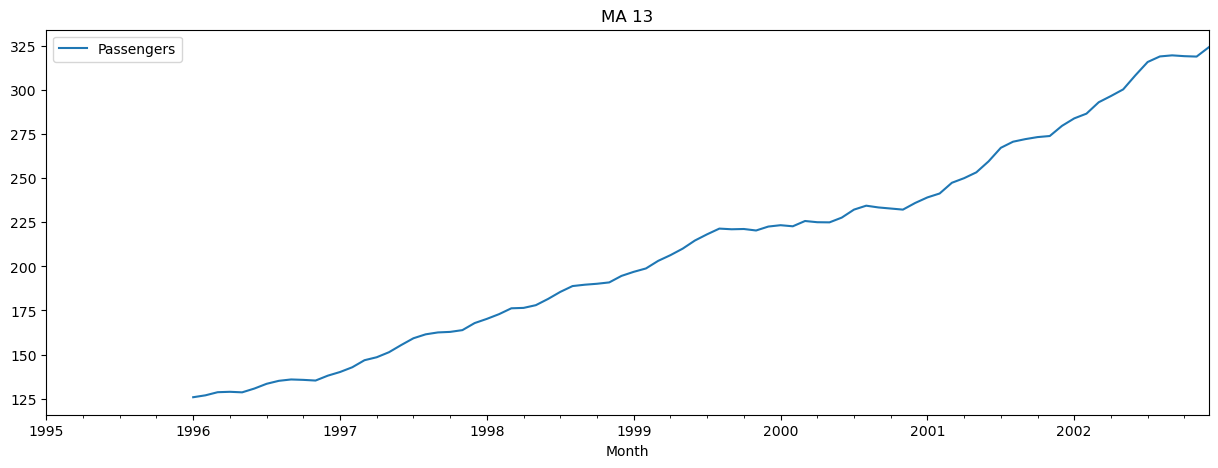

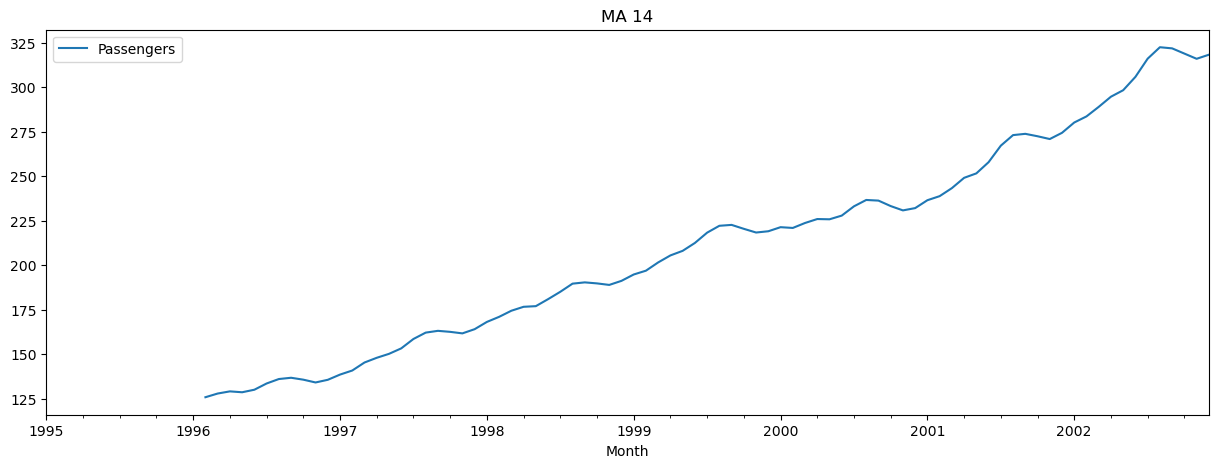

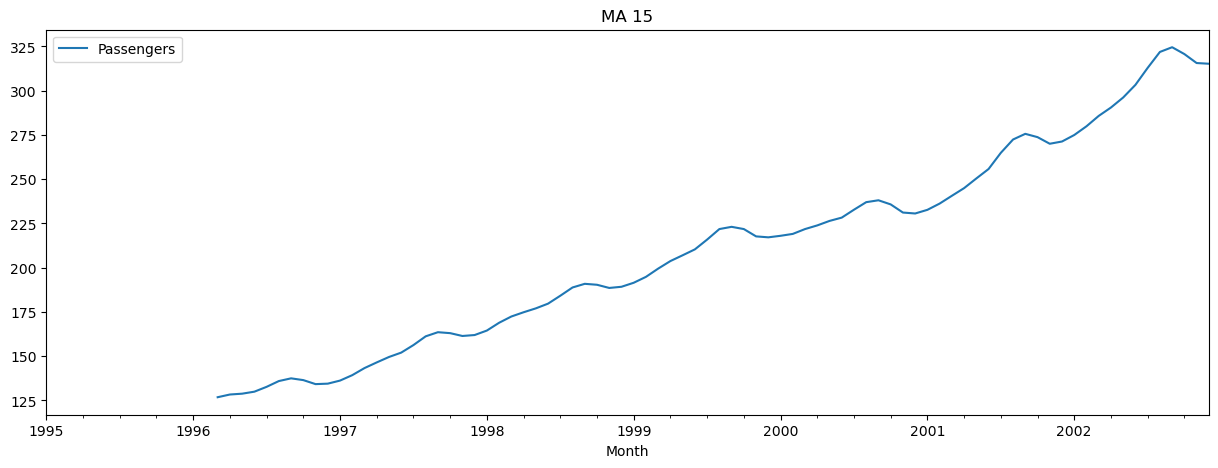

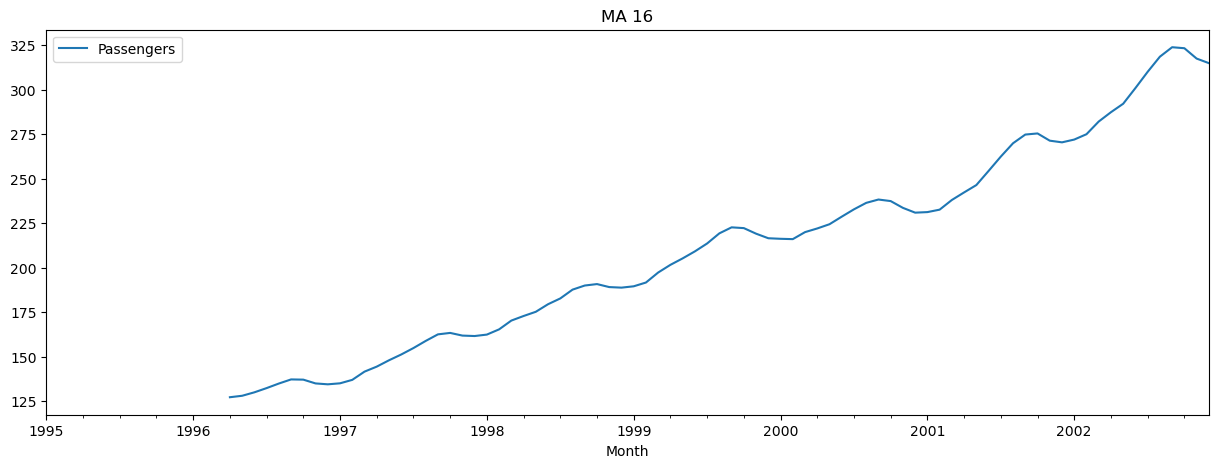

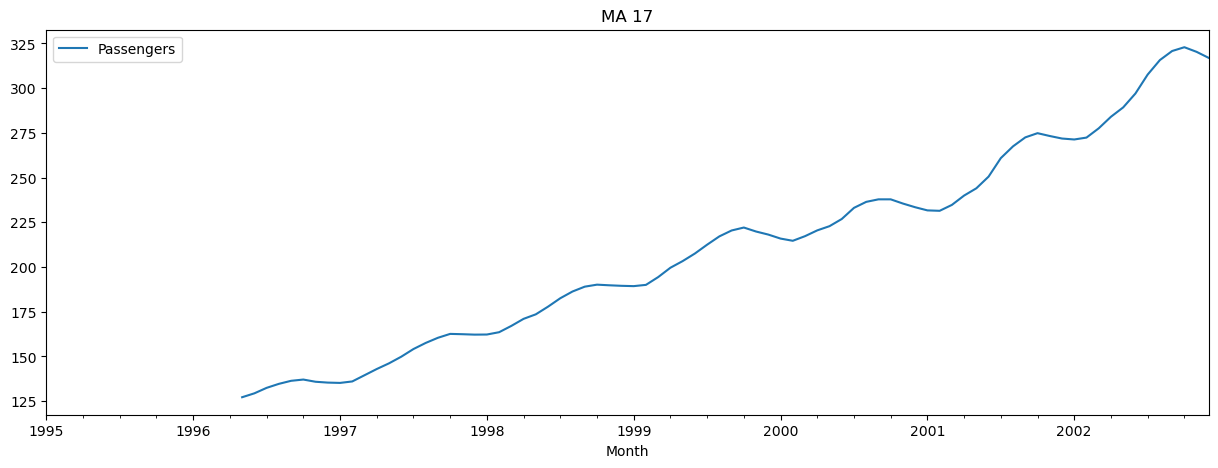

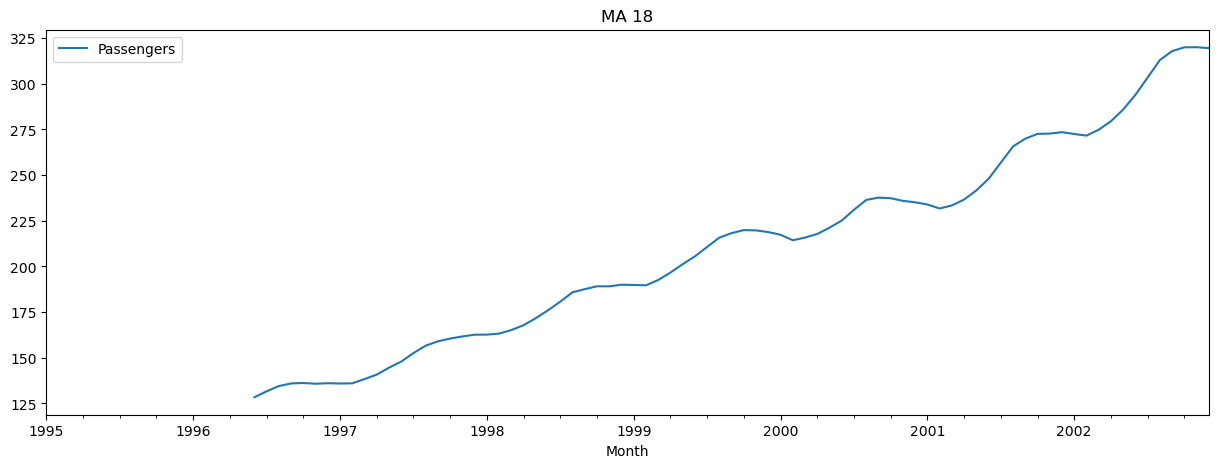

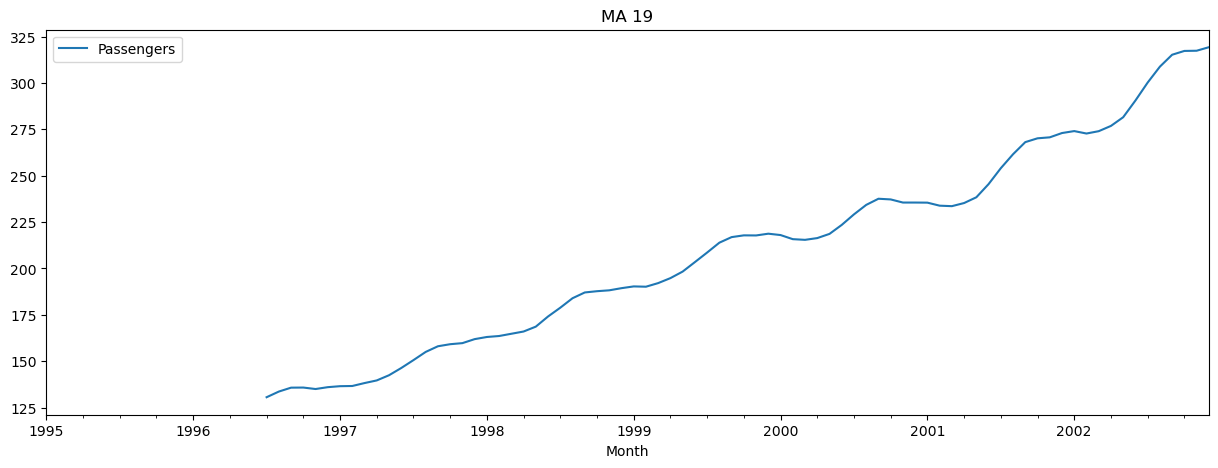

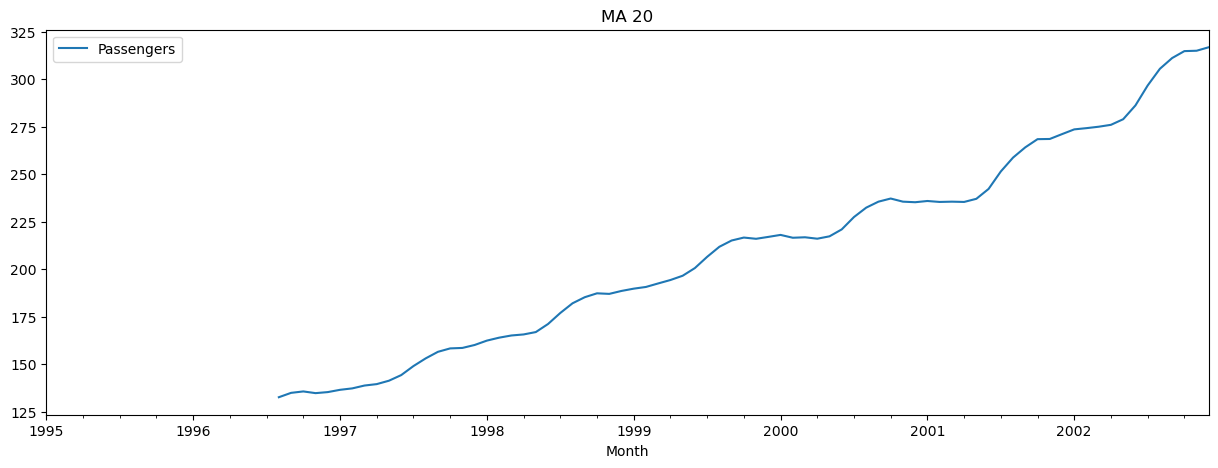

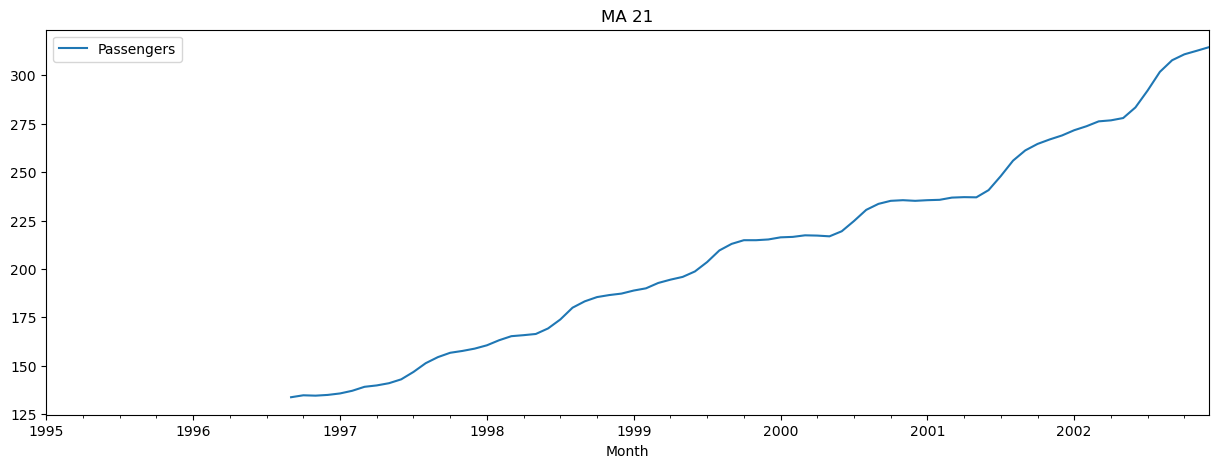

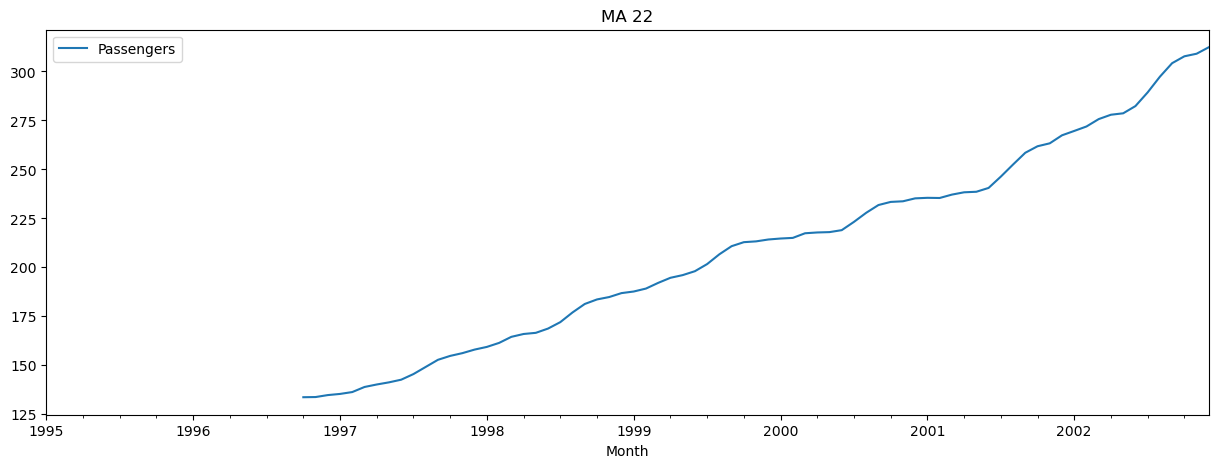

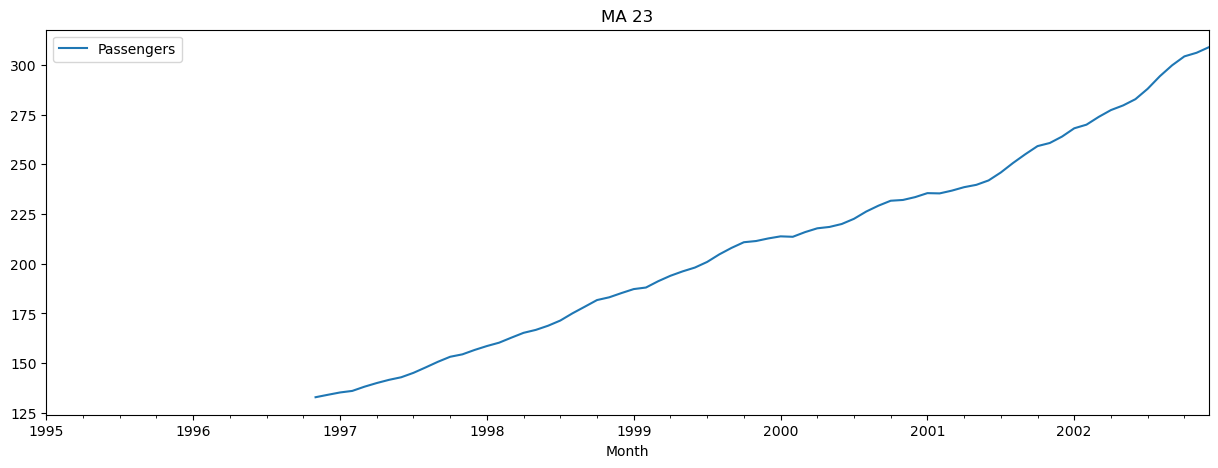

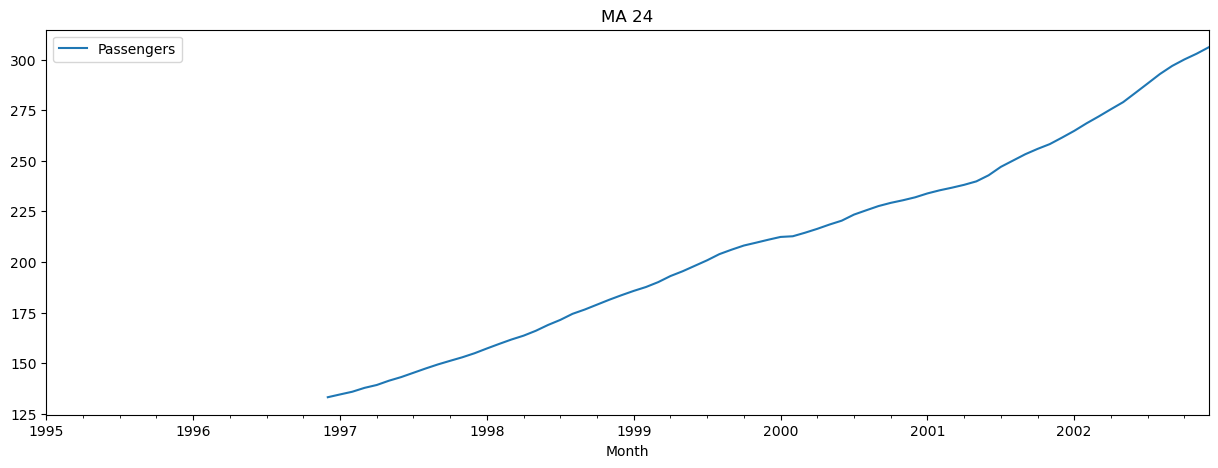

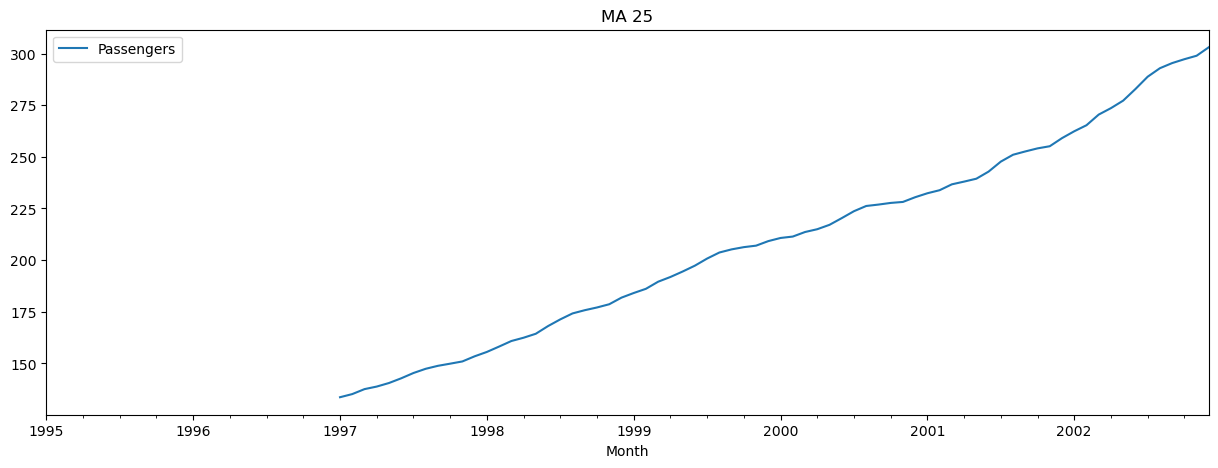

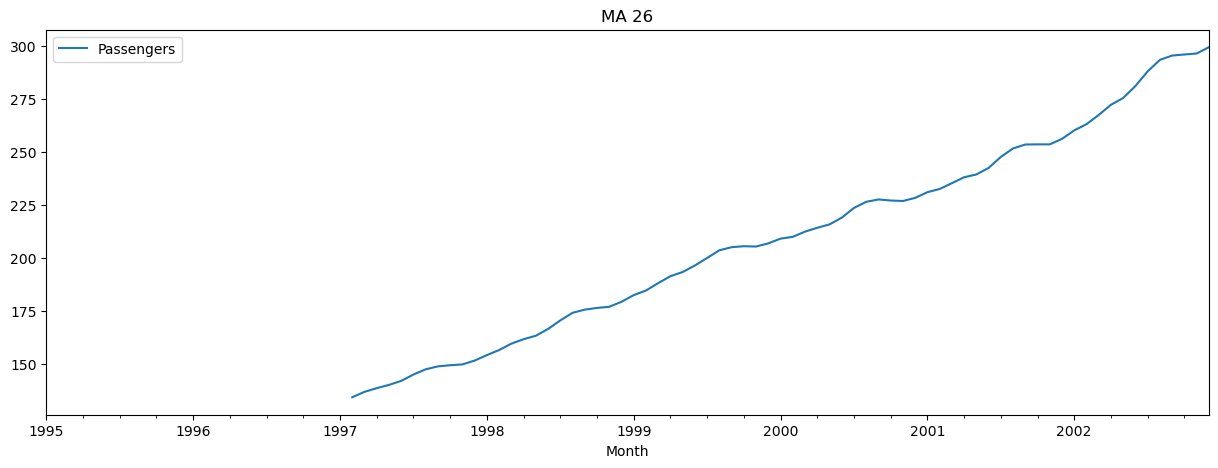

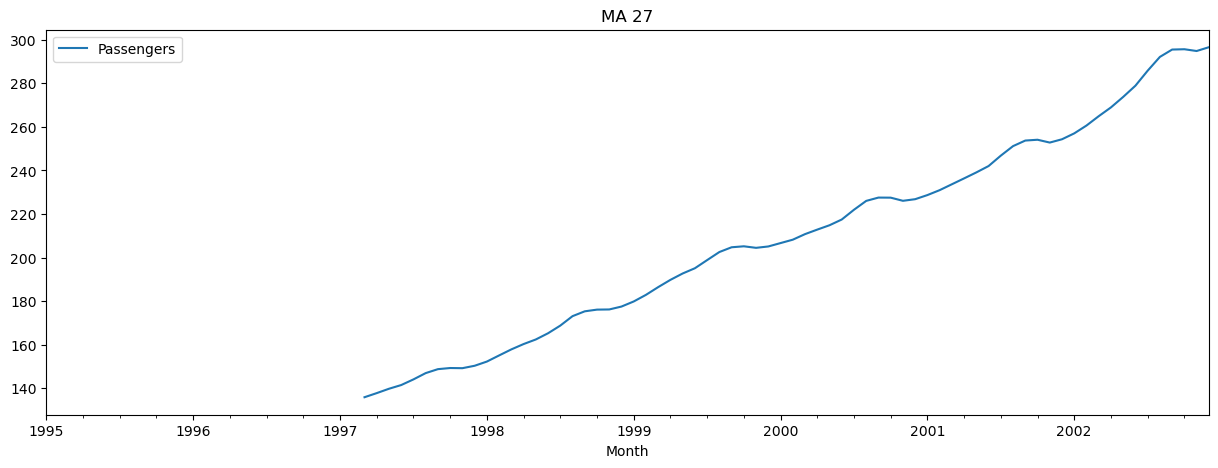

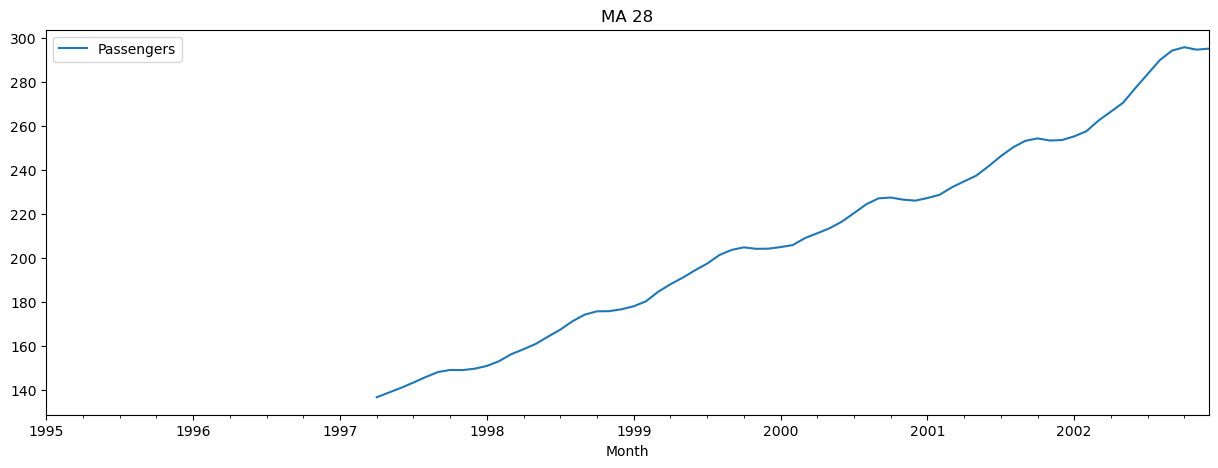

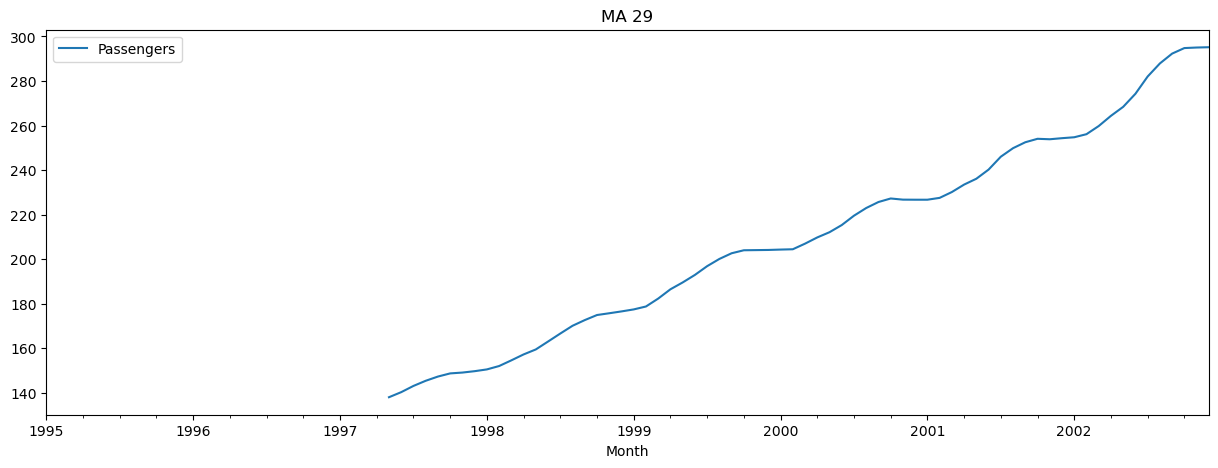

In [10]:
data.plot()
plt.title("Original")
plt.show()

for i in range(2,30):
    data.rolling(window=i).mean().plot()
    plt.title("MA "+ str(i))
    plt.show()

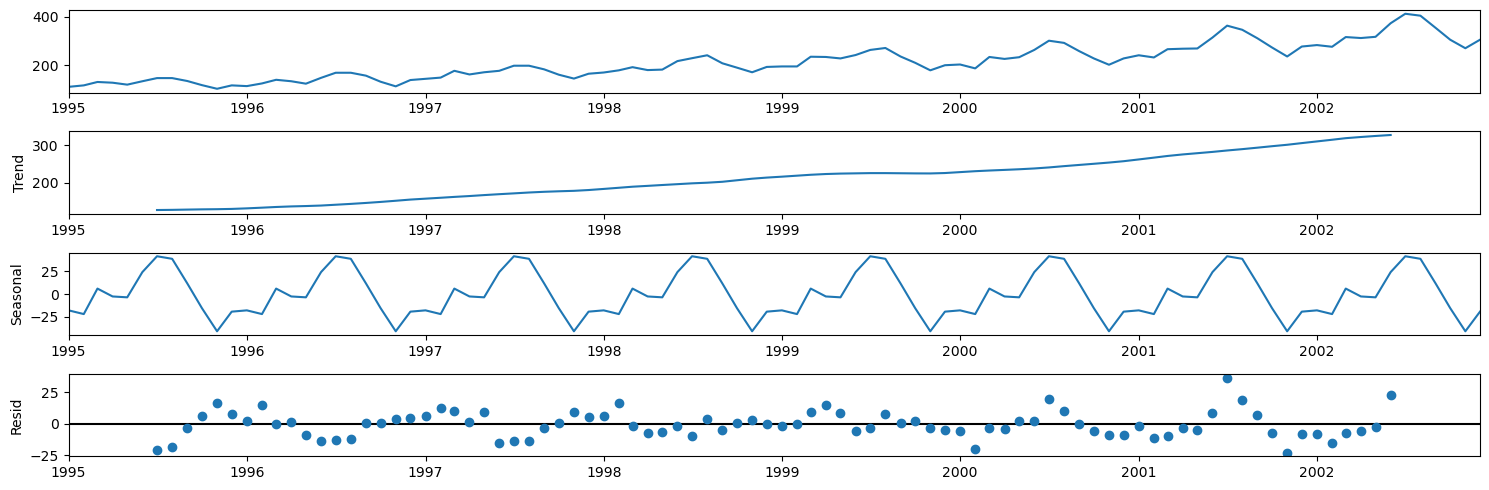

In [11]:
seasonal_decompose(data).plot();

In [12]:
train=data[:84]
test=data[84:]

In [13]:
model=ExponentialSmoothing(train["Passengers"],trend="add",seasonal="mul",seasonal_periods=12).fit()

C:\Users\Administrator\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


In [14]:
forecast=model.forecast(25)
forecast

2002-01-01    281.194412
2002-02-01    278.386649
2002-03-01    322.560801
2002-04-01    312.458639
2002-05-01    311.026816
2002-06-01    348.878462
2002-07-01    389.549464
2002-08-01    384.754930
2002-09-01    341.861188
2002-10-01    300.740169
2002-11-01    262.171701
2002-12-01    299.378258
2003-01-01    304.813899
2003-02-01    301.607750
2003-03-01    349.280873
2003-04-01    338.164425
2003-05-01    336.440575
2003-06-01    377.192258
2003-07-01    420.951607
2003-08-01    415.563618
2003-09-01    369.053771
2003-10-01    324.504351
2003-11-01    282.752717
2003-12-01    322.727320
2004-01-01    328.433385
Freq: MS, dtype: float64

<AxesSubplot:>

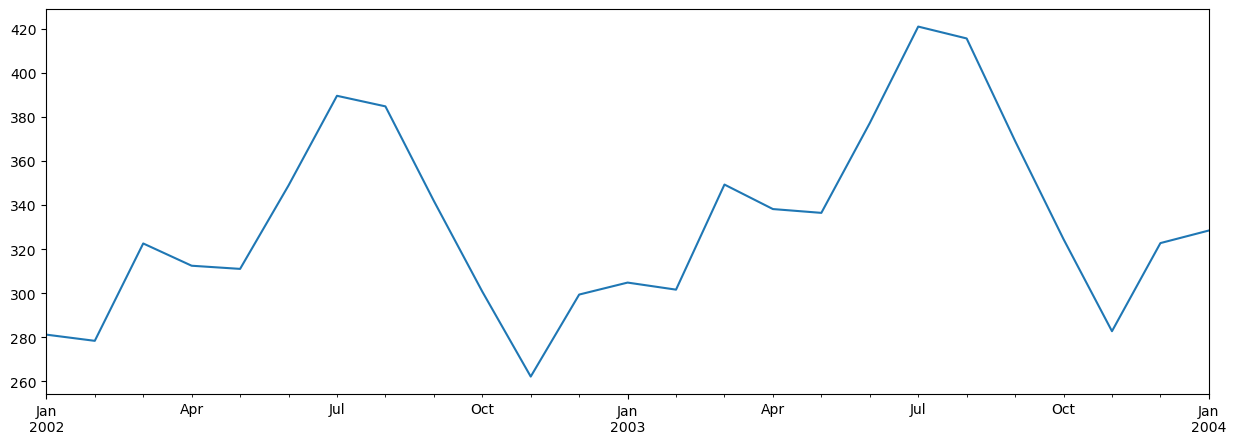

In [15]:
forecast.plot()

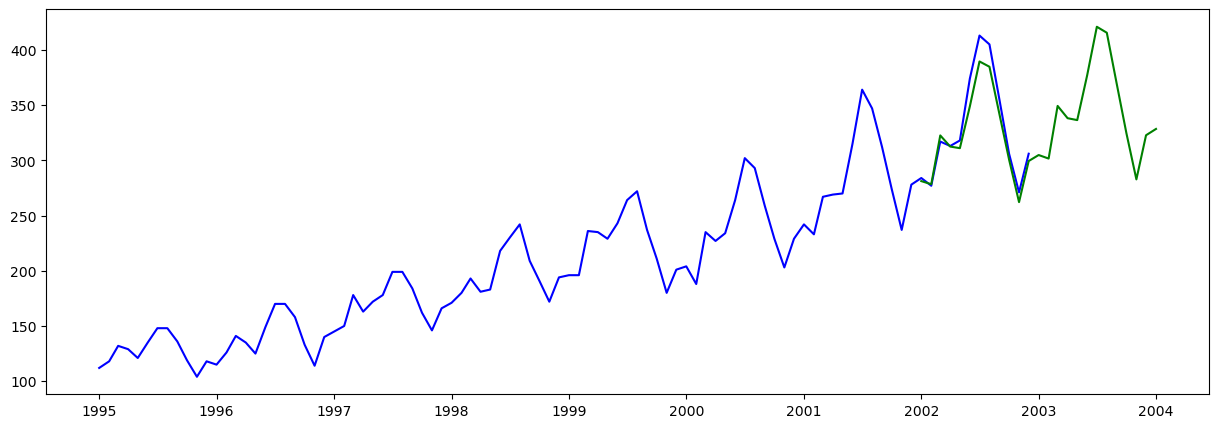

In [16]:
plt.plot(data,color="blue",label="original")
plt.plot(forecast,color="green")
plt.show()

In [17]:
def MAPE(org,pred):
    temp = np.abs((pred-org)/org)*100
    return np.mean(temp)

In [18]:
MAPE(test["Passengers"],forecast)

2.8203284548190433